In [1]:
import tensorflow as tf

In [2]:
print(f'wersja tensorflow: {tf.__version__}')

wersja tensorflow: 2.10.1


In [3]:
mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
x_train,x_test = x_train/255.0,x_test/255.0

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


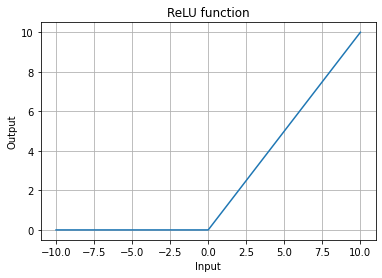

In [8]:

import numpy as np
import matplotlib.pyplot as plt

# Define the ReLU function
def relu(x):
    return np.maximum(0, x)

# Generate some x values to plot
x = np.linspace(-10, 10, 1000)

# Generate the corresponding y values for ReLU function
y = relu(x)

# Create the plot
plt.plot(x, y)
plt.title('ReLU function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.show()

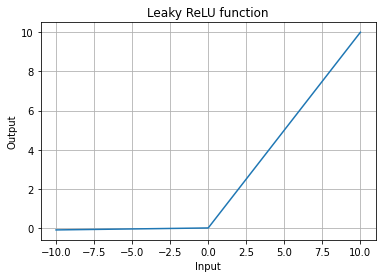

In [9]:
# Define the leaky ReLU function
def leaky_relu(x):
    return np.where(x > 0, x, x * 0.01)

# Generate some x values to plot
x_ = np.linspace(-10, 10, 1000)

# Generate the corresponding y values for leaky ReLU function
y_ = leaky_relu(x_)

# Create the plot
plt.plot(x_, y_)
plt.title('Leaky ReLU function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.show()

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
history = model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2919 - accuracy: 0.9154
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1414 - accuracy: 0.9581
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1063 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0864 - accuracy: 0.9726
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0742 - accuracy: 0.9764


In [12]:
#ocena modelu - ewaluacja modelu
test_loss,test_accuracy = model.evaluate(x_test,y_test,verbose=2)
print(f'Test accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

313/313 - 1s - loss: 0.0782 - accuracy: 0.9771 - 580ms/epoch - 2ms/step
Test accuracy: 0.9771000146865845
Test Loss: 0.07820284366607666


In [13]:
import matplotlib.pyplot as plt

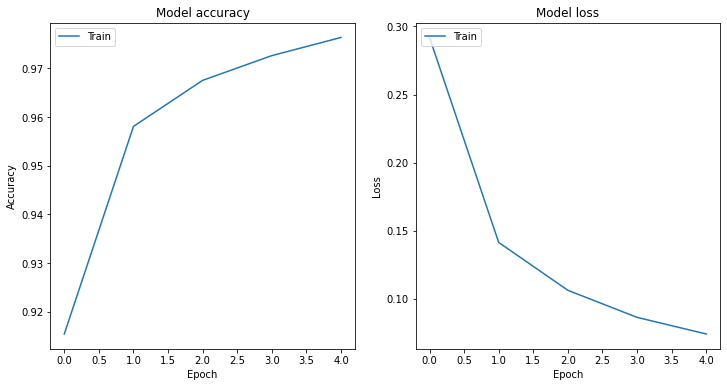

In [14]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'],loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'],loc='upper left')

plt.show()